# Uploading Dataset

Getting the dataset.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Dataset2.csv to Dataset2.csv


In [0]:
# importing libraries
import io
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# reading the dataset

df = pd.read_csv(io.BytesIO(uploaded['Dataset2.csv']))

For the sake of simplicity, we consider only the target variable and 4 feature variables.

In [0]:
cols = ["TARGET_deathRate", "avgDeathsPerYear", "incidenceRate", "AvgHouseholdSize", "BirthRate"]

data = df[cols].copy()

In [0]:
data.head()

,TARGET_deathRate,avgDeathsPerYear,incidenceRate,AvgHouseholdSize,BirthRate
0,164.9,469,489.8,2.54,6.118831
1,161.3,70,411.6,2.34,4.333096
2,174.7,50,349.7,2.62,3.729488
3,194.8,202,430.4,2.52,4.603841
4,144.4,26,350.1,2.34,6.796657


In [0]:
data.describe()

,TARGET_deathRate,avgDeathsPerYear,incidenceRate,AvgHouseholdSize,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,178.664063,185.965868,448.268586,2.479662,5.640306
std,27.751511,504.134286,54.560733,0.429174,1.985816
min,59.700000,3.000000,201.300000,0.022100,0.000000
25%,161.200000,28.000000,420.300000,2.370000,4.521419
50%,178.100000,61.000000,453.549422,2.500000,5.381478
75%,195.200000,149.000000,480.850000,2.630000,6.493677
max,362.800000,14010.000000,1206.900000,3.970000,21.326165


# Visualising the Distribution

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

First, we want to observe the distribution of the target variable on 3 parameters - symmetricity, skewness and modality. 

A histogram is used for that purpose.

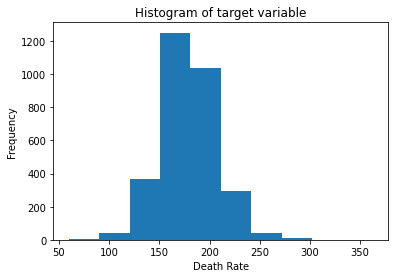

In [0]:
plt.hist(data.TARGET_deathRate)
plt.title("Histogram of target variable")
plt.xlabel("Death Rate")
plt.ylabel("Frequency")
plt.show()

With 10 classes, the distribution of the variable is not really clear. So, the no. of classes is increased.

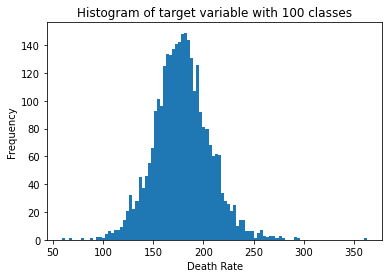

In [0]:
plt.hist(data.TARGET_deathRate, bins=100)
plt.title("Histogram of target variable with 100 classes")
plt.xlabel("Death Rate")
plt.ylabel("Frequency")
plt.show()

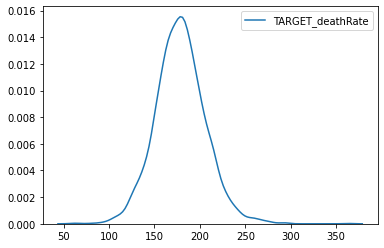

In [0]:
sns.kdeplot(data.TARGET_deathRate)

From this histogram with 100 classes, it seems that the distribution is normal and there does not seem to be any skewness. There is a single mode in the distribution.


Next, we consider the feature "avgDeathsPerYear". 

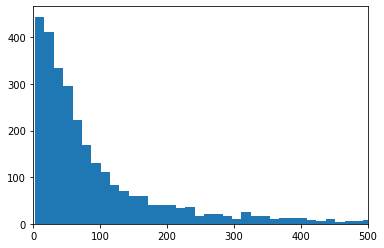

In [0]:
plt.hist(data.avgDeathsPerYear, bins=1000)
plt.xlim(0, 500)
plt.show()

Observation : Unimodal, positive skew 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Kernel Density Estimation Plot : [Kernel density estimation](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) is a non-parametric method of estimating the probability density function (PDF) of a continuous random variable. 

Probability density is the relationship between observations and their probability.The probability of a value being between the points x1 and x2 is the total shaded area of the curve under the two points.

(0.0, 2000.0)

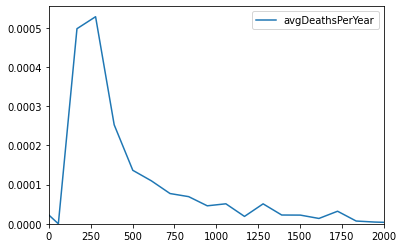

In [0]:
sns.kdeplot(data.avgDeathsPerYear)
plt.xlim(0, 2000)

Observation : Unimodal, positive skewed, not normal

The next feature to be considered is "AvgHouseholdSize".

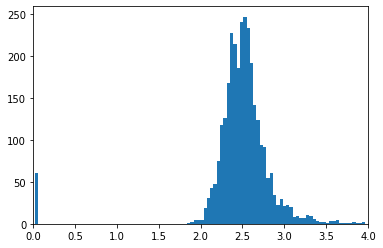

In [0]:
plt.hist(data.AvgHouseholdSize, bins=100)
plt.xlim(0, 4)
plt.show()

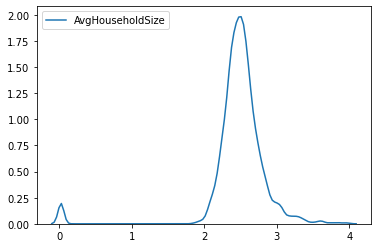

In [0]:
sns.kdeplot(data.AvgHouseholdSize)

Observation : It seems that the distribution is bimodal, negatively skewed and not normal.

Let's have another look at the skewness values, and see if our numerical observations correspond to the plot.

In [0]:
data.skew()

TARGET_deathRate     0.274724
avgDeathsPerYear    11.949188
incidenceRate        0.771935
AvgHouseholdSize    -3.380988
BirthRate            1.323203
dtype: float64

Observation : 

# Kurtosis

Kurtosis : steepness of peaks, broadness of tails

![Kurtosis](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSELD7UKm7nrpgS5x2c9E1x6RlndFovKdjjgr54xAVosJQjjz0Y)

If kurtosis < 3, platykurtic. If kurtosis > 3, leptokurtic.

In [0]:
data.kurtosis()

TARGET_deathRate      1.354622
avgDeathsPerYear    242.659927
incidenceRate        16.796490
AvgHouseholdSize     19.373609
BirthRate             5.229389
dtype: float64

Observation :


# Subplots

We can also make figures in subplots.

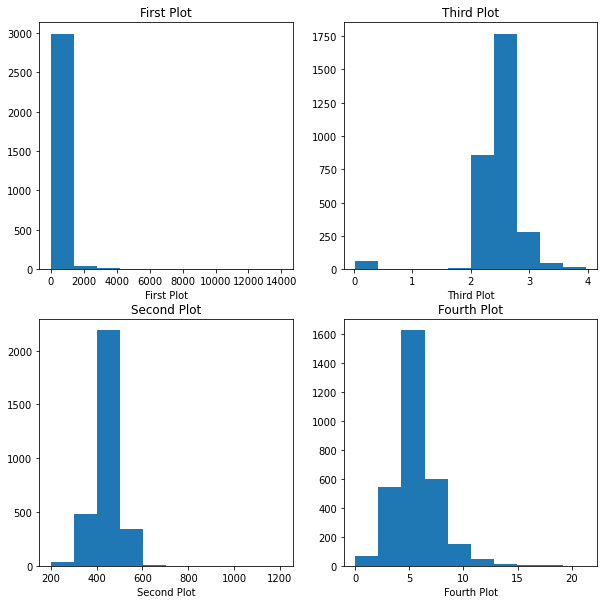

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data.avgDeathsPerYear)
axs[1, 0].hist(data.incidenceRate)
axs[0, 1].hist(data.AvgHouseholdSize)
axs[1, 1].hist(data.BirthRate)

axs[0, 0].set_title('First Plot')
axs[1, 0].set_title('Second Plot')
axs[0, 1].set_title('Third Plot')
axs[1, 1].set_title('Fourth Plot')

axs[0, 0].set_xlabel('First Plot')
axs[1, 0].set_xlabel('Second Plot')
axs[0, 1].set_xlabel('Third Plot')
axs[1, 1].set_xlabel('Fourth Plot')

plt.show()

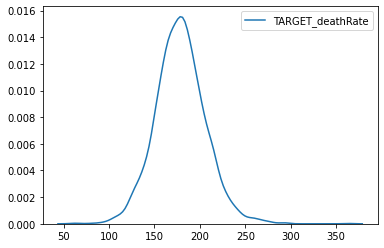

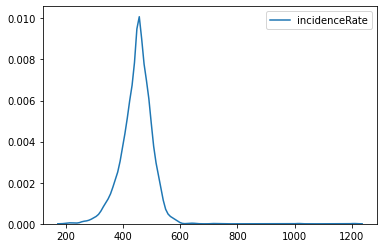

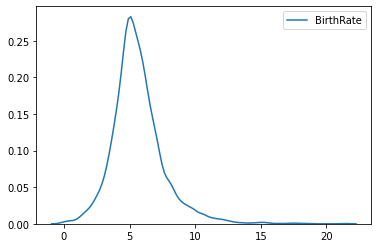

In [0]:
sns.kdeplot(data.TARGET_deathRate)
plt.show()
sns.kdeplot(data.incidenceRate)
plt.show()
sns.kdeplot(data.BirthRate)

# Heatmap

Remember the correlation matrix. Here comes the correlation heatmap. 

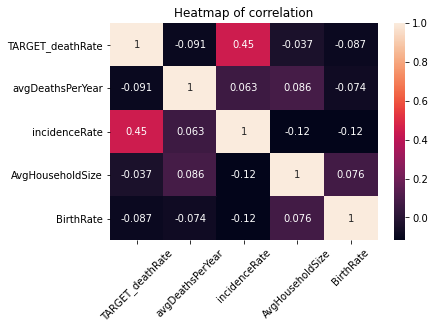

In [0]:
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of correlation")
plt.show()

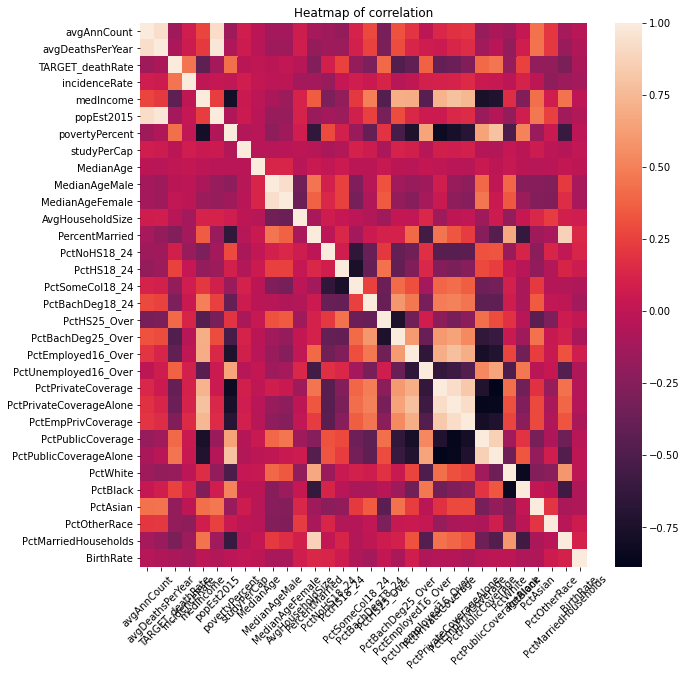

In [0]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
plt.xticks(rotation=45)
plt.title("Heatmap of correlation")
plt.show()

Observation :

# Pairplot

A way to visualize the distributions and the relationships in the dataframe all at once.

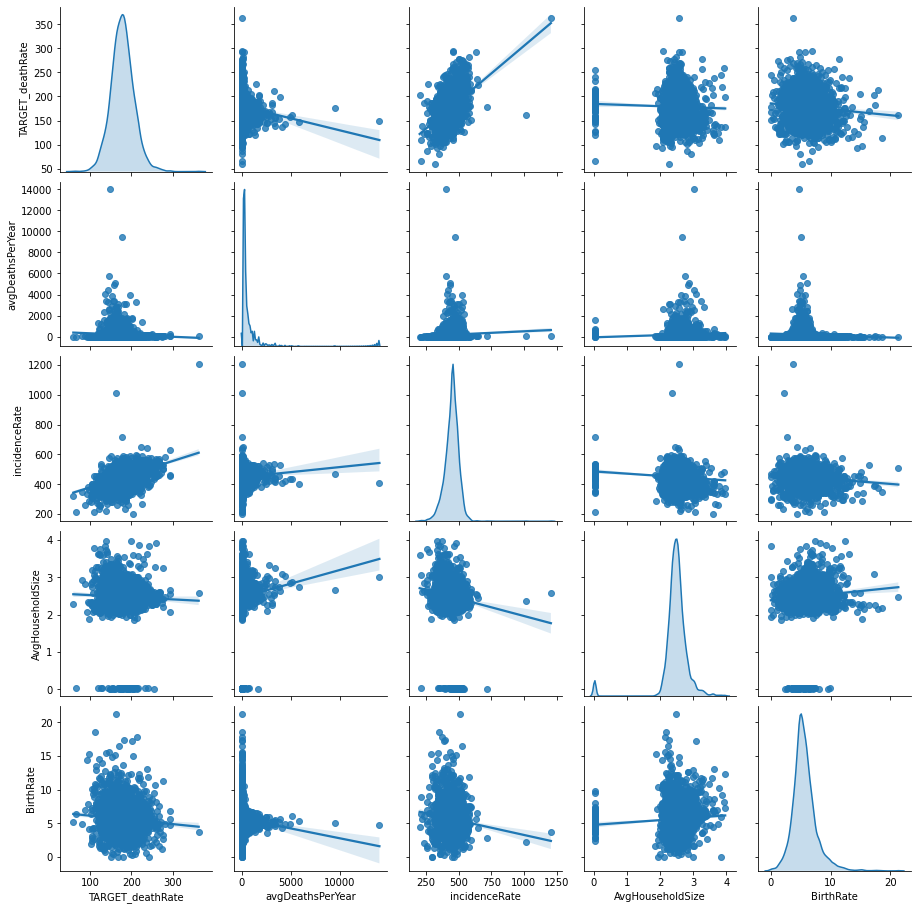

In [0]:
sns.pairplot(data, diag_kind='kde', kind='reg')

Observation :

# Boxplots

Another way to visualise distributions are boxplots.

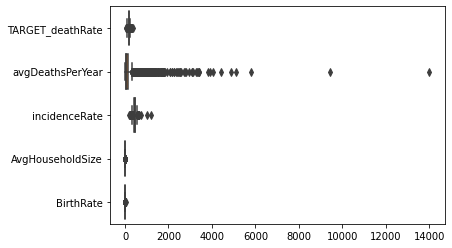

In [0]:
sns.boxplot(data=data, orient='h')

But this doesn't really help. So let's just take one at a time.

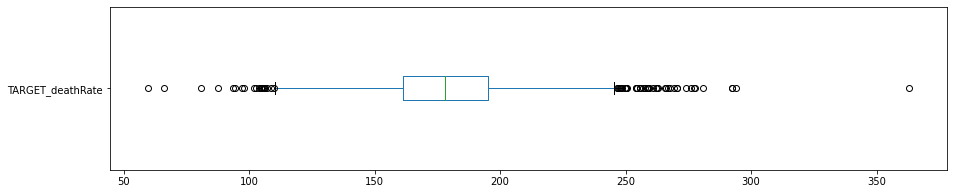

In [0]:
plt.figure(figsize=(15, 3))
data.boxplot("TARGET_deathRate", vert=0, grid=False)

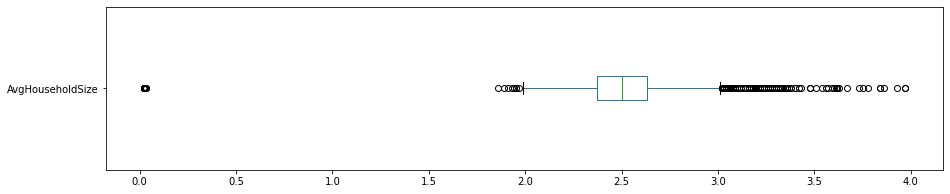

In [0]:
plt.figure(figsize=(15, 3))
data.boxplot("AvgHouseholdSize", vert=0, grid=False)

Observation :

# Visualizations for categorical features

In [0]:
df.binnedInc

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3042      (45201, 48021.6]
3043    (48021.6, 51046.4]
3044    (51046.4, 54545.6]
3045    (48021.6, 51046.4]
3046    (40362.7, 42724.4]
Name: binnedInc, Length: 3047, dtype: object

In [0]:
df.binnedInc.value_counts()

[22640, 34218.1]      306
(54545.6, 61494.5]    306
(45201, 48021.6]      306
(48021.6, 51046.4]    305
(51046.4, 54545.6]    305
(42724.4, 45201]      305
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(37413.8, 40362.7]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

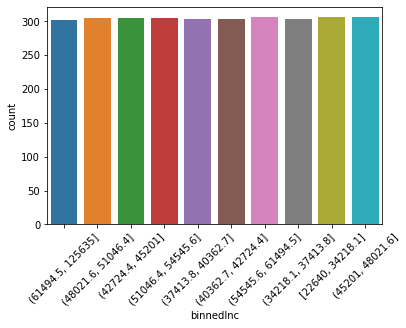

In [0]:
# A simple frequency diagram

sns.countplot(x="binnedInc", data=df)
plt.xticks(rotation=45)
plt.show()

This is a case of balanced categories, where the count of each class is similar.

Another fancy visualization for categories.

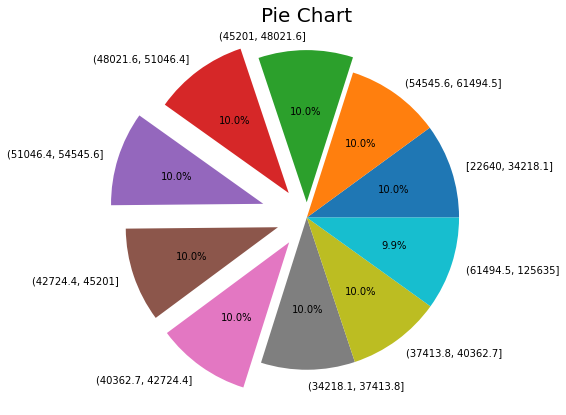

In [0]:
  labels=df['binnedInc'].value_counts().index
  explode=[0,0,0.1,0.2,0.3, 0.2, 0.2, 0, 0,0]
  values=df['binnedInc'].value_counts().values

  #visualization
  plt.figure(figsize=(7,7))
  plt.pie(values,explode=explode,labels=labels, autopct='%1.1f%%')
  plt.title('Pie Chart',color='black', fontsize=20)
  plt.show()